In [3]:
import itertools

from game import GameSimulator, LocalMaximaPlayer, MinimaxPlayer, RandomPlayer

ROUNDS_PER_PLAYER = 100

# define your players
players = [RandomPlayer(23), RandomPlayer(24), LocalMaximaPlayer(), MinimaxPlayer()]

# create a list of all possible pairs of players
player_pairs = list(itertools.combinations(players, 2))

# create a dictionary to keep track of each player's total wins, losses and draws against each other player
results = {player: {opponent: [0, 0, 0] for opponent in players } for player in players}

# simulate the tournament
for pair in player_pairs:
    player1, player2 = pair

    # skip self play
    if player1 == player2:
        continue

    for i in range(ROUNDS_PER_PLAYER):
        game = GameSimulator([player1, player2])
        game.simulate_game()
        if game.score[0] > game.score[1]:
            results[player1][player2][0] += 1  # player1 wins
            results[player2][player1][1] += 1  # player2 loses
        elif game.score[1] > game.score[0]:
            results[player2][player1][0] += 1  # player2 wins
            results[player1][player2][1] += 1  # player1 loses
        else: # draw
            results[player2][player1][2] += 1
            results[player1][player2][2] += 1


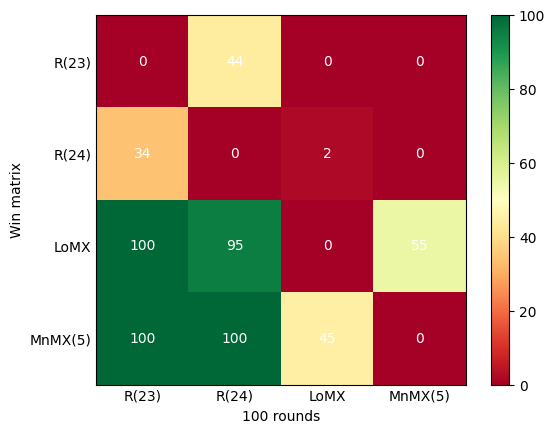

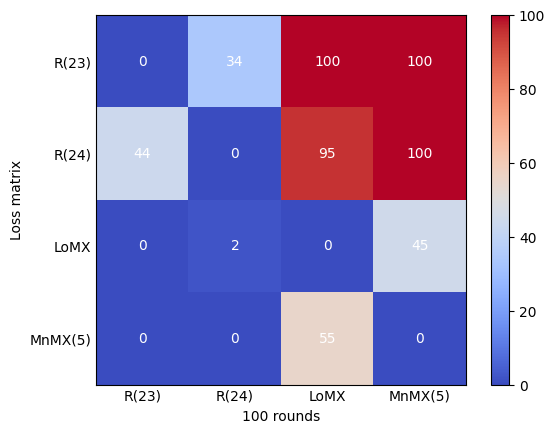

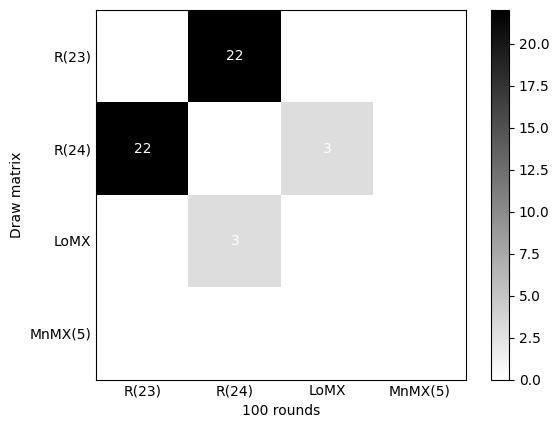

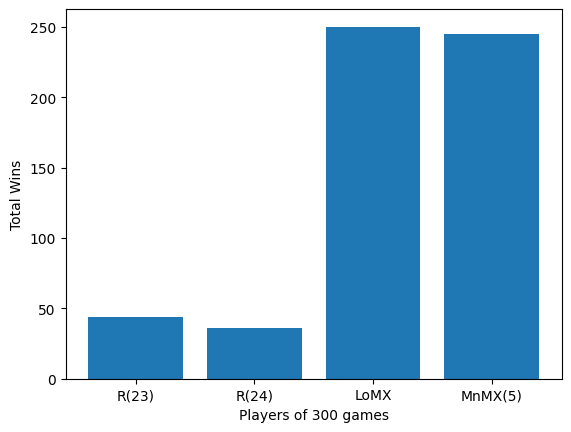

In [4]:
import matplotlib.pyplot as plt


# Create a grid of win counts between each pair of players
fig, ax = plt.subplots()

win_matrix_values = [[results[player][opponent][0] for opponent in players] for player in players]
im = ax.imshow(win_matrix_values, cmap='RdYlGn')

# set up the grid
ax.set_xticks(range(len(players)))
ax.set_yticks(range(len(players)))
ax.set_xticklabels([player.name for player in players])
ax.set_yticklabels([player.name for player in players])
ax.tick_params(axis='both', which='both', length=0)
ax.set_ylabel(f"Win matrix")
ax.set_xlabel(f"{ROUNDS_PER_PLAYER} rounds")

# Total win bar chart
for i, p1 in enumerate(players):
    for j, p2 in enumerate(players):
        text = ax.text(j, i, results[p1][p2][0], ha='center', va='center', color='w')

cbar = ax.figure.colorbar(im, ax=ax)

# Create a grid of loss counts between each pair of players
fig, ax = plt.subplots()

loss_matrix_values = [[results[player][opponent][1] for opponent in players] for player in players]
im = ax.imshow(loss_matrix_values, cmap='coolwarm')

# set up the grid
ax.set_xticks(range(len(players)))
ax.set_yticks(range(len(players)))
ax.set_xticklabels([player.name for player in players])
ax.set_yticklabels([player.name for player in players])
ax.tick_params(axis='both', which='both', length=0)
ax.set_ylabel(f"Loss matrix")
ax.set_xlabel(f"{ROUNDS_PER_PLAYER} rounds")

# Total loss bar chart
for i, p1 in enumerate(players):
    for j, p2 in enumerate(players):
        text = ax.text(j, i, results[p1][p2][1], ha='center', va='center', color='w')

cbar = ax.figure.colorbar(im, ax=ax)

# Create a grid of draws counts between each pair of players
fig, ax = plt.subplots()

draw_matrix_values = [[results[player][opponent][2] for opponent in players] for player in players]
im = ax.imshow(draw_matrix_values, cmap='binary')

# set up the grid
ax.set_xticks(range(len(players)))
ax.set_yticks(range(len(players)))
ax.set_xticklabels([player.name for player in players])
ax.set_yticklabels([player.name for player in players])
ax.tick_params(axis='both', which='both', length=0)
ax.set_ylabel(f"Draw matrix")
ax.set_xlabel(f"{ROUNDS_PER_PLAYER} rounds")


# Total draw bar chart
for i, p1 in enumerate(players):
    for j, p2 in enumerate(players):
        text = ax.text(j, i, results[p1][p2][2], ha='center', va='center', color='w')

# add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# create a bar chart of total player wins
fig, ax = plt.subplots()
ax.bar(range(len(players)), [sum([result[0] for result in results[player].values()]) for player in players])
ax.set_xticks(range(len(players)))
ax.set_xticklabels([player.name for player in players])
ax.set_ylabel(f"Total Wins")
ax.set_xlabel(f"Players of {(len(players) - 1) * ROUNDS_PER_PLAYER} games")
plt.show()